In [1]:
# Question 1.1.1
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession 
from pyspark import SparkConf
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Introduction to Apache Spark"

#Question 1.1.2
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)
# TODO: Create Spark Configuration Object
sc = SparkContext.getOrCreate(spark_conf)
sc.setLogLevel('ERROR')
# TODO: Create SparkSession
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()

In [2]:
from pyspark.sql.functions import *

In [3]:
#Question 1.2.1

#Loading Bureau data
df_bureau = spark.read.format('csv')\
            .option('header',True)\
            .option('inferSchema',True).option('escape','"')\
            .load('bureau.csv')

In [4]:
#Printing Schema
df_bureau.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SELF-INDICATOR: boolean (nullable = true)
 |-- MATCH-TYPE: string (nullable = true)
 |-- ACCT-TYPE: string (nullable = true)
 |-- CONTRIBUTOR-TYPE: string (nullable = true)
 |-- DATE-REPORTED: string (nullable = true)
 |-- OWNERSHIP-IND: string (nullable = true)
 |-- ACCOUNT-STATUS: string (nullable = true)
 |-- DISBURSED-DT: string (nullable = true)
 |-- CLOSE-DT: string (nullable = true)
 |-- LAST-PAYMENT-DATE: string (nullable = true)
 |-- CREDIT-LIMIT/SANC AMT: string (nullable = true)
 |-- DISBURSED-AMT/HIGH CREDIT: string (nullable = true)
 |-- INSTALLMENT-AMT: string (nullable = true)
 |-- CURRENT-BAL: string (nullable = true)
 |-- INSTALLMENT-FREQUENCY: string (nullable = true)
 |-- OVERDUE-AMT: string (nullable = true)
 |-- WRITE-OFF-AMT: integer (nullable = true)
 |-- ASSET_CLASS: string (nullable = true)
 |-- REPORTED DATE - HIST: string (nullable = true)
 |-- DPD - HIST: string (nullable = true)
 |-- CUR BAL - HIST: string (nulla

In [5]:
#Number of rows in the bureau dataframe
df_bureau.count()

624863

In [6]:
#Defining the Schema for Customer dataframe
from pyspark.sql.types import StructField,IntegerType, StructType,StringType, DoubleType
DF=[StructField('ID',IntegerType(),True),
       StructField('Frequency',StringType(),True),
       StructField('InstlmentMode',StringType(),True),
       StructField('LoanStatus',StringType(),True),
       StructField('PaymentMode',StringType(),True),
       StructField('BranchID',StringType(),True),
       StructField('Area',StringType(),True) ,
       StructField('Tenure',IntegerType(),True), 
       StructField('AssetCost',IntegerType(),True) ,
       StructField('AmountFinance',DoubleType(),True) ,
       StructField('DisbursalAmount',DoubleType(),True), 
       StructField('EMI',DoubleType(),True), 
       StructField('DisbursalDate',StringType(),True) ,
       StructField('MaturityDAte',StringType(),True), 
       StructField('AuthDate',StringType(),True), 
       StructField('AssetID',StringType(),True),
       StructField('ManufacturerID',StringType(),True),
       StructField('SupplierID',StringType(),True),
       StructField('LTV',DoubleType(),True), 
       StructField('SEX',StringType(),True), 
       StructField('AGE',IntegerType(),True), 
       StructField('MonthlyIncome',DoubleType(),True), 
       StructField('City',StringType(),True),
       StructField('State',StringType(),True),
       StructField('ZiPCODE',IntegerType(),True),
       StructField('Top-up Month',StringType(),True)
       ]

In [7]:
schema_struct =StructType(fields=DF)

In [8]:
#Creating the customer dataframe using the above schema
df_customer =spark.read.csv('customer.csv',schema=schema_struct)

In [9]:
#Printing Schema
df_customer.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Frequency: string (nullable = true)
 |-- InstlmentMode: string (nullable = true)
 |-- LoanStatus: string (nullable = true)
 |-- PaymentMode: string (nullable = true)
 |-- BranchID: string (nullable = true)
 |-- Area: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- AssetCost: integer (nullable = true)
 |-- AmountFinance: double (nullable = true)
 |-- DisbursalAmount: double (nullable = true)
 |-- EMI: double (nullable = true)
 |-- DisbursalDate: string (nullable = true)
 |-- MaturityDAte: string (nullable = true)
 |-- AuthDate: string (nullable = true)
 |-- AssetID: string (nullable = true)
 |-- ManufacturerID: string (nullable = true)
 |-- SupplierID: string (nullable = true)
 |-- LTV: double (nullable = true)
 |-- SEX: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- MonthlyIncome: double (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZiPCODE: integer (nu

In [10]:
#Number of rows
df_customer.count()

143401

In [11]:
#Question 1.2.2

#Replacing the ',' with '' in numeric columns before typecasting
from pyspark.sql.functions import udf
UDF = udf(lambda s: s.replace(',', '') if s else 'None', StringType())

In [12]:
#Type casting the chosen columns from String Type to Integer Type

from pyspark.sql.functions import col,when
df_bureau = df_bureau.withColumn("DISBURSED-AMT/HIGH CREDIT",UDF(col("DISBURSED-AMT/HIGH CREDIT")))
df_bureau = df_bureau.withColumn("DISBURSED-AMT/HIGH CREDIT", col("DISBURSED-AMT/HIGH CREDIT").cast(IntegerType()))

df_bureau = df_bureau.withColumn("CURRENT-BAL",UDF(col("CURRENT-BAL")))
df_bureau = df_bureau.withColumn("CURRENT-BAL", col("CURRENT-BAL").cast(IntegerType()))

df_bureau = df_bureau.withColumn("CREDIT-LIMIT/SANC AMT",UDF(col("CREDIT-LIMIT/SANC AMT")))
df_bureau = df_bureau.withColumn("CREDIT-LIMIT/SANC AMT", col("CREDIT-LIMIT/SANC AMT").cast(IntegerType()))

df_bureau = df_bureau.withColumn("OVERDUE-AMT",UDF(col("OVERDUE-AMT")))
df_bureau = df_bureau.withColumn("OVERDUE-AMT", col("OVERDUE-AMT").cast(IntegerType()))

df_bureau = df_bureau.withColumn("CUR BAL - HIST",UDF(col("CUR BAL - HIST")))
df_bureau = df_bureau.withColumn("CUR BAL - HIST", col("CUR BAL - HIST").cast(IntegerType()))


In [13]:
df_bureau.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SELF-INDICATOR: boolean (nullable = true)
 |-- MATCH-TYPE: string (nullable = true)
 |-- ACCT-TYPE: string (nullable = true)
 |-- CONTRIBUTOR-TYPE: string (nullable = true)
 |-- DATE-REPORTED: string (nullable = true)
 |-- OWNERSHIP-IND: string (nullable = true)
 |-- ACCOUNT-STATUS: string (nullable = true)
 |-- DISBURSED-DT: string (nullable = true)
 |-- CLOSE-DT: string (nullable = true)
 |-- LAST-PAYMENT-DATE: string (nullable = true)
 |-- CREDIT-LIMIT/SANC AMT: integer (nullable = true)
 |-- DISBURSED-AMT/HIGH CREDIT: integer (nullable = true)
 |-- INSTALLMENT-AMT: string (nullable = true)
 |-- CURRENT-BAL: integer (nullable = true)
 |-- INSTALLMENT-FREQUENCY: string (nullable = true)
 |-- OVERDUE-AMT: integer (nullable = true)
 |-- WRITE-OFF-AMT: integer (nullable = true)
 |-- ASSET_CLASS: string (nullable = true)
 |-- REPORTED DATE - HIST: string (nullable = true)
 |-- DPD - HIST: string (nullable = true)
 |-- CUR BAL - HIST: integer (

In [14]:
#Question 1.2.3

#Filtering all the Null values 

df_customer1 = df_customer
for c in df_customer.columns:
    c = str(c)
    df_customer1 = df_customer1.filter(col(c).isNotNull()) 

In [15]:
#Number of rows after dropping Null values
df_customer1.count()

121308

In [16]:
#Number of rows containing null values
df_customer.count()-df_customer1.count()

22093

In [18]:
#Question 1.2.4

#Displaying the pecentage of Null rows in Bureau dataframe
for c in df_bureau.columns:
    
    c = str(c)
    percentage_null = df_bureau.select(count(when(col(c).isNull(), c))*100/count(lit(1))).alias(c)
    print(c)
    print(percentage_null.take(1))

ID
[Row(((count(CASE WHEN (ID IS NULL) THEN ID END) * 100) / count(1))=0.0)]
SELF-INDICATOR
[Row(((count(CASE WHEN (SELF-INDICATOR IS NULL) THEN SELF-INDICATOR END) * 100) / count(1))=0.0)]
MATCH-TYPE
[Row(((count(CASE WHEN (MATCH-TYPE IS NULL) THEN MATCH-TYPE END) * 100) / count(1))=0.0)]
ACCT-TYPE
[Row(((count(CASE WHEN (ACCT-TYPE IS NULL) THEN ACCT-TYPE END) * 100) / count(1))=0.0)]
CONTRIBUTOR-TYPE
[Row(((count(CASE WHEN (CONTRIBUTOR-TYPE IS NULL) THEN CONTRIBUTOR-TYPE END) * 100) / count(1))=0.0)]
DATE-REPORTED
[Row(((count(CASE WHEN (DATE-REPORTED IS NULL) THEN DATE-REPORTED END) * 100) / count(1))=0.5894091984963103)]
OWNERSHIP-IND
[Row(((count(CASE WHEN (OWNERSHIP-IND IS NULL) THEN OWNERSHIP-IND END) * 100) / count(1))=0.0)]
ACCOUNT-STATUS
[Row(((count(CASE WHEN (ACCOUNT-STATUS IS NULL) THEN ACCOUNT-STATUS END) * 100) / count(1))=0.0)]
DISBURSED-DT
[Row(((count(CASE WHEN (DISBURSED-DT IS NULL) THEN DISBURSED-DT END) * 100) / count(1))=5.15216935552273)]
CLOSE-DT
[Row(((count(CA

In [17]:
#Dropping the required columns with Null values more than 20%
df_bureau1=df_bureau.drop('TENURE','CUR BAL - HIST','ASSET_CLASS','OVERDUE-AMT','INSTALLMENT-FREQUENCY','INSTALLMENT-AMT','CREDIT-LIMIT/SANC AMT','LAST-PAYMENT-DATE','CLOSE-DT')
df_bureau1.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SELF-INDICATOR: boolean (nullable = true)
 |-- MATCH-TYPE: string (nullable = true)
 |-- ACCT-TYPE: string (nullable = true)
 |-- CONTRIBUTOR-TYPE: string (nullable = true)
 |-- DATE-REPORTED: string (nullable = true)
 |-- OWNERSHIP-IND: string (nullable = true)
 |-- ACCOUNT-STATUS: string (nullable = true)
 |-- DISBURSED-DT: string (nullable = true)
 |-- DISBURSED-AMT/HIGH CREDIT: integer (nullable = true)
 |-- CURRENT-BAL: integer (nullable = true)
 |-- WRITE-OFF-AMT: integer (nullable = true)
 |-- REPORTED DATE - HIST: string (nullable = true)
 |-- DPD - HIST: string (nullable = true)
 |-- AMT OVERDUE - HIST: string (nullable = true)
 |-- AMT PAID - HIST: string (nullable = true)



In [18]:
#Question 1.2.5

#Dropping all columns with Hist or Dates

df_bureau1 = df_bureau1.drop('AMT PAID - HIST','AMT OVERDUE - HIST','DPD - HIST','REPORTED DATE - HIST','DATE-REPORTED','DISBURSED-DT','LAST-PAYMENT-DATE')
df_bureau1.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SELF-INDICATOR: boolean (nullable = true)
 |-- MATCH-TYPE: string (nullable = true)
 |-- ACCT-TYPE: string (nullable = true)
 |-- CONTRIBUTOR-TYPE: string (nullable = true)
 |-- OWNERSHIP-IND: string (nullable = true)
 |-- ACCOUNT-STATUS: string (nullable = true)
 |-- DISBURSED-AMT/HIGH CREDIT: integer (nullable = true)
 |-- CURRENT-BAL: integer (nullable = true)
 |-- WRITE-OFF-AMT: integer (nullable = true)



In [19]:
df_bureau1.select(df_bureau1.columns[:10]).show(15)

+---+--------------+----------+--------------------+----------------+-------------+--------------+-------------------------+-----------+-------------+
| ID|SELF-INDICATOR|MATCH-TYPE|           ACCT-TYPE|CONTRIBUTOR-TYPE|OWNERSHIP-IND|ACCOUNT-STATUS|DISBURSED-AMT/HIGH CREDIT|CURRENT-BAL|WRITE-OFF-AMT|
+---+--------------+----------+--------------------+----------------+-------------+--------------+-------------------------+-----------+-------------+
|  1|         false|   PRIMARY|Auto Loan (Personal)|             NAB|   Individual|        Active|                    44000|      20797|            0|
|  1|         false|   PRIMARY|           Overdraft|             NAB|   Individual|    Delinquent|                    37352|      37873|            0|
|  1|          true|   PRIMARY|Auto Loan (Personal)|             NBF|   Individual|        Closed|                   400000|          0|            0|
|  1|          true|   PRIMARY|Auto Loan (Personal)|             NBF|   Individual|        Clo

In [49]:
#Q1.3.1

#Bureau dataset

from pyspark.sql.functions import mean, stddev, col,desc

#Numeric columns
cols_int = ['WRITE-OFF-AMT','CURRENT-BAL','DISBURSED-AMT/HIGH CREDIT']

for c in df_bureau1.columns:
    

    c = str(c)
    if c!='ID'and c!='Top-up Month':
        if c in cols_int:
            print('Numeric column \n',c)
            
            #Calculating the count
            count1 = df_bureau1.select(c).count()
            
            print('\n count = \n',count1)
            
            print('\n mean = \n')
            
             #Calculating the mean of the column using the mean() function
            df_bureau1.select(mean(c)).alias('mean').show()

            print('stddev = \n')
            
            #Calculating the standard deviation for the column
            stddev1 = df_bureau1.select(stddev(col(c))).show()
            
            print('min = \n')
            
            #Calculating the minimum value for the column
            minimum = df_bureau1.select(min(col(c))).show()
            
            print('max =\n')
            
            #Calculating the maximum value for the column
            maximum = df_bureau1.select(max(col(c))).show()
        else:
            print('Non Numeric column \n',c)
             
            #Calculating and displaying the top 10 highest values and their respective counts 
            df_bureau1.groupBy(c).count().orderBy(col('count').desc()).show(10)
            

Non Numeric column 
 SELF-INDICATOR
+--------------+------+
|SELF-INDICATOR| count|
+--------------+------+
|         false|442851|
|          true|182012|
+--------------+------+

Non Numeric column 
 MATCH-TYPE
+----------+------+
|MATCH-TYPE| count|
+----------+------+
|   PRIMARY|624638|
| SECONDARY|   225|
+----------+------+

Non Numeric column 
 ACCT-TYPE
+--------------------+------+
|           ACCT-TYPE| count|
+--------------------+------+
|        Tractor Loan|208051|
|           Gold Loan| 98602|
|Business Loan Pri...| 88274|
|   Kisan Credit Card| 37621|
|Auto Loan (Personal)| 33504|
|               Other| 31729|
|Commercial Vehicl...| 21296|
|    Two-Wheeler Loan| 17656|
|         Credit Card| 14397|
|       Consumer Loan| 13769|
+--------------------+------+
only showing top 10 rows

Non Numeric column 
 CONTRIBUTOR-TYPE
+----------------+------+
|CONTRIBUTOR-TYPE| count|
+----------------+------+
|             NBF|286311|
|             NAB|191368|
|             PRB| 84

In [50]:
#Customer dataset

#Numeric columns
cols_int = ['Tenure','AssetCost','AmountFinance','DisbursalAmount','EMI','LTV','AGE','MonthlyIncome','ZiPCODE']

for c in df_customer1.columns:
    
    
    c = str(c)
    
    if c!='ID'and c!='Top-up Month':
        
        if c in cols_int:
            
            print('Numeric column \n',c)
            
            #Calculating the count
            count1 = df_customer.select(c).count()
            
            print('\n count = \n',count1)
            
            print('\n mean = \n')
            
            #Calculating the mean of the column using the mean() function
            df_customer.select(mean(c)).alias('mean').show()

            print('stddev = \n')
            
            #Calculating the standard deviation for the column
            stddev1 = df_customer.select(stddev(col(c))).show()
            
            print('min = \n')
            
            #Calculating the minimum value for the column
            minimum = df_customer.select(min(col(c))).show()
            
            print('max =\n')
            
            #Calculating the maximum value for the column
            maximum = df_customer.select(max(col(c))).show()
            
        else:
            print('Non Numeric column \n',c)
            
            #Calculating and displaying the top 10 highest values and their respective counts 
            df_customer1.groupBy(c).count().orderBy(col('count').desc()).show(10)
   

Non Numeric column 
 Frequency
+-----------+-----+
|  Frequency|count|
+-----------+-----+
|Half Yearly|78986|
|    Monthly|22535|
|    Quatrly|19482|
| BI-Monthly|  305|
+-----------+-----+

Non Numeric column 
 InstlmentMode
+-------------+------+
|InstlmentMode| count|
+-------------+------+
|       Arrear|116999|
|      Advance|  4309|
+-------------+------+

Non Numeric column 
 LoanStatus
+----------+-----+
|LoanStatus|count|
+----------+-----+
|    Closed|86260|
|    Active|35048|
+----------+-----+

Non Numeric column 
 PaymentMode
+------------+-----+
| PaymentMode|count|
+------------+-----+
|         ECS|33078|
|Direct Debit|32545|
|         PDC|25951|
|      Billed|17668|
|       PDC_E| 9398|
|  Auto Debit|  905|
|   SI Reject|  803|
|      Cheque|  489|
|  ECS Reject|  457|
|      Escrow|    7|
+------------+-----+
only showing top 10 rows

Non Numeric column 
 BranchID
+--------+-----+
|BranchID|count|
+--------+-----+
|      24| 4534|
|     199| 4391|
|     166| 2464|
| 

+-----------------+
|     avg(ZiPCODE)|
+-----------------+
|424878.6789207632|
+-----------------+

stddev = 

+--------------------+
|stddev_samp(ZiPCODE)|
+--------------------+
|   172878.2229738363|
+--------------------+

min = 

+------------+
|min(ZiPCODE)|
+------------+
|      110000|
+------------+

max =

+------------+
|max(ZiPCODE)|
+------------+
|      855456|
+------------+



In [51]:
#Question 1.3.2

#Storing the values in a new data frame
df_bureau2 = df_bureau1

#importing necessary functions 
from pyspark.sql.functions import countDistinct

#Summing the numeric columns and counting distinct values for the non-numeric columns and renaming them appropriately 
df_bureau2 = (df_bureau2.selectExpr('*')
 .groupby("ID")
 .agg(sum('WRITE-OFF-AMT').alias('WRITE-OFF-AMT_sum'),
      sum('CURRENT-BAL').alias('CURRENT-BAL_sum'),
      sum('DISBURSED-AMT/HIGH CREDIT').alias('DISBURSED-AMT/HIGH CREDIT_sum'),
      countDistinct('SELF-INDICATOR').alias('SELF-INDICATOR_dist'),
      countDistinct('MATCH-TYPE').alias('MATCH-TYPE_dist'),
      countDistinct('ACCT-TYPE').alias('ACCT-TYPE_dist'),
      countDistinct('CONTRIBUTOR-TYPE').alias('CONTRIBUTOR-TYPE_dist'),
      countDistinct('OWNERSHIP-IND').alias('OWNERSHIP-IND_dist'),
      countDistinct('ACCOUNT-STATUS').alias('ACCOUNT-STATUS_dist')
       ))

In [52]:
#Displaying the values
df_bureau2.show(10)

+-----+-----------------+---------------+-----------------------------+-------------------+---------------+--------------+---------------------+------------------+-------------------+
|   ID|WRITE-OFF-AMT_sum|CURRENT-BAL_sum|DISBURSED-AMT/HIGH CREDIT_sum|SELF-INDICATOR_dist|MATCH-TYPE_dist|ACCT-TYPE_dist|CONTRIBUTOR-TYPE_dist|OWNERSHIP-IND_dist|ACCOUNT-STATUS_dist|
+-----+-----------------+---------------+-----------------------------+-------------------+---------------+--------------+---------------------+------------------+-------------------+
|12799|                0|        1008976|                      1960000|                  2|              1|             3|                    2|                 1|                  3|
|33412|                0|              0|                      3643521|                  2|              1|             3|                    2|                 2|                  2|
|37263|                0|        2200935|                      4192264|         

In [53]:
#Question 1.3.3
df_inner_join = df_customer1.join(df_bureau2, on=['ID'], how='inner')

In [54]:
#Displaying initial column values
df_inner_join.select('Top-up Month').show()

+-----------------+
|     Top-up Month|
+-----------------+
|No Top-up Service|
|No Top-up Service|
|     30-36 Months|
|      > 48 Months|
|No Top-up Service|
|No Top-up Service|
|No Top-up Service|
|     36-48 Months|
|     30-36 Months|
|     24-30 Months|
|No Top-up Service|
|No Top-up Service|
|No Top-up Service|
|No Top-up Service|
|No Top-up Service|
|No Top-up Service|
|No Top-up Service|
|No Top-up Service|
|No Top-up Service|
|No Top-up Service|
+-----------------+
only showing top 20 rows



In [55]:
#Defining a UDF to convert Top-up Month to numeric
def rep_top_month(string):
    if string == 'No Top-up Service':
        return 0
    else:
        return 1

    #Creating the UDF function
UDF = udf(lambda z: rep_top_month(z),IntegerType())

In [56]:
#Passing the the Top-up Month column to UDF to replace values
df_inner_join = df_inner_join.withColumn('Top-up', UDF('Top-up Month'))

df_inner_join = df_inner_join.drop('Top-up Month')

In [57]:
#Displaying the column values
df_inner_join.select('Top-up').show()

+------+
|Top-up|
+------+
|     0|
|     0|
|     1|
|     1|
|     0|
|     0|
|     0|
|     1|
|     1|
|     1|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
|     0|
+------+
only showing top 20 rows



In [60]:
#Question 1.3.4
import pandas as pd

df_bureau_pd = df_bureau2.toPandas()

#Plotting a correlation graph between the bureau dataframe columns
cor= df_bureau_pd.corr()
cor.style.background_gradient(cmap='coolwarm')

,ID,WRITE-OFF-AMT_sum,CURRENT-BAL_sum,DISBURSED-AMT/HIGH CREDIT_sum,SELF-INDICATOR_dist,MATCH-TYPE_dist,ACCT-TYPE_dist,CONTRIBUTOR-TYPE_dist,OWNERSHIP-IND_dist,ACCOUNT-STATUS_dist
ID,1.000000,-0.005924,-0.012518,-0.018147,-0.013182,-0.006840,-0.071853,-0.057271,-0.063969,-0.057253
WRITE-OFF-AMT_sum,-0.005924,1.000000,0.027087,0.015716,0.024268,0.002476,0.038467,0.032056,0.031667,0.063417
CURRENT-BAL_sum,-0.012518,0.027087,1.000000,0.417640,0.109655,0.000009,0.241033,0.174879,0.181779,0.154561
DISBURSED-AMT/HIGH CREDIT_sum,-0.018147,0.015716,0.417640,1.000000,0.069409,-0.000798,0.146016,0.109489,0.116167,0.089062
SELF-INDICATOR_dist,-0.013182,0.024268,0.109655,0.069409,1.000000,-0.018623,0.635575,0.688675,0.427027,0.677474
MATCH-TYPE_dist,-0.006840,0.002476,0.000009,-0.000798,-0.018623,1.000000,0.009346,0.008884,0.009419,0.010122
ACCT-TYPE_dist,-0.071853,0.038467,0.241033,0.146016,0.635575,0.009346,1.000000,0.772410,0.533694,0.677250
CONTRIBUTOR-TYPE_dist,-0.057271,0.032056,0.174879,0.109489,0.688675,0.008884,0.772410,1.000000,0.443063,0.648898
OWNERSHIP-IND_dist,-0.063969,0.031667,0.181779,0.116167,0.427027,0.009419,0.533694,0.443063,1.000000,0.458659
ACCOUNT-STATUS_dist,-0.057253,0.063417,0.154561,0.089062,0.677474,0.010122,0.677250,0.648898,0.458659,1.000000


From the above correlation graph, we observe that ID has very little influence on any other column. This is due to the column having distinct values. We observe the columns ACCT-TYPE_dist, SELF-INDICATOR_dist,CONTRIBUTOR-TYPE_dist,OWNERSHIP-IND_dist and ACCOUNT-STATUS_dist have strong correlation with each other and are hence very useful for making predictions. WRITE-OFF-AMT_sum and MATCH-TYPE_dist do not have good coorelation with the other columns but they could have unique information lacking in the other columns.  

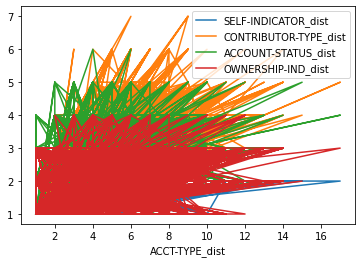

In [50]:
import matplotlib.pyplot as plt
df_bureau_pd.plot(x = 'ACCT-TYPE_dist',y = ['SELF-INDICATOR_dist','CONTRIBUTOR-TYPE_dist','ACCOUNT-STATUS_dist','OWNERSHIP-IND_dist'])
plt.show()

We can deduce from the above plot that their is indeed a high correlation between the columns ACCT-TYPE_dist, SELF-INDICATOR_dist,CONTRIBUTOR-TYPE_dist,OWNERSHIP-IND_dist and ACCOUNT-STATUS_dist. Higher correlation implies that the predictions are more accurate as the chance of the label being either 1 or 0 by chance or randomness is reduced and higher correlation also represents a very strong relationship between the columns. 

In [49]:
#Converting the top-up column to numerc before plotting a correlation graph
df_customer2 = df_customer1.withColumn('Top-up', UDF('Top-up Month'))
df_customer2 = df_customer2.drop('Top-up Month')

#Converting to pandas
df_customer_pd = df_customer2.toPandas()

#Plotting a correlation graph
cor = df_customer_pd.corr()
cor.style.background_gradient(cmap='coolwarm')

,ID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,LTV,AGE,MonthlyIncome,ZiPCODE,Top-up
ID,1.000000,-0.036345,0.029422,0.053481,0.053473,-0.006573,0.043998,-0.049878,0.005267,-0.098008,0.032031
Tenure,-0.036345,1.000000,0.074648,0.400131,0.398219,0.035528,0.440296,0.005565,-0.000673,0.052804,0.034179
AssetCost,0.029422,0.074648,1.000000,0.567310,0.567400,0.289419,-0.049663,-0.041835,0.002794,0.168132,0.072301
AmountFinance,0.053481,0.400131,0.567310,1.000000,0.998765,0.366346,0.727824,-0.028907,0.001468,0.183794,0.108558
DisbursalAmount,0.053473,0.398219,0.567400,0.998765,1.000000,0.370092,0.727843,-0.028189,0.001486,0.183091,0.108765
EMI,-0.006573,0.035528,0.289419,0.366346,0.370092,1.000000,0.126175,0.065598,0.000559,0.008912,0.044998
LTV,0.043998,0.440296,-0.049663,0.727824,0.727843,0.126175,1.000000,0.000485,0.000100,0.111216,0.074182
AGE,-0.049878,0.005565,-0.041835,-0.028907,-0.028189,0.065598,0.000485,1.000000,-0.004558,0.106582,-0.011120
MonthlyIncome,0.005267,-0.000673,0.002794,0.001468,0.001486,0.000559,0.000100,-0.004558,1.000000,-0.005456,-0.000804
ZiPCODE,-0.098008,0.052804,0.168132,0.183794,0.183091,0.008912,0.111216,0.106582,-0.005456,1.000000,0.031098


From the above correlation graph, we observe that AmountFinance and DisbursalAmount have the most correlation with Top-up column than the other columns. This is useful because the loan given is expected to influence whether or not it would be topped up. LTV and asset cost too influence the top-up column but to a lesser degree. Since EMI and MonthlyIncome have little correlation to the label column, it is clear that the decision on Top-up is influenced more by the amount of existing loan rather than the ability to pay it off.  

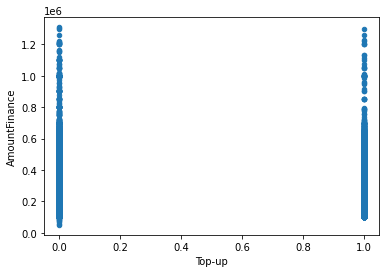

In [103]:
df_customer_pd.plot(x = 'Top-up',y = 'AmountFinance', kind ='scatter')
plt.show()

The above plot shows a strong correlation between Top-up and AmountFinanace. Though the column is more likely to influence a prediction of Top-up = 0 owing to the skew in data. We compare these 2 columns as the loan amount given to a customer has a weightage on whether or not they would be able to take a Top-up on the current loan. We observe that for high values of AmountFinance, a customer is more likely to not take a Top-up. 

In [61]:
#PART 2

#Question 2.1

(training, test) = df_inner_join.randomSplit([0.8, 0.2])

In [62]:
#Question 2.1.2

#Total number of training rows
training.count()

96971

In [63]:
#Number of rows where Top-up = 1
training.select('Top-up').where(col('Top-up') ==1).count()

25263

In [64]:
#Number of rows where Top-up = 0
training.select('Top-up').where(col('Top-up') == 0).count()

71708

In [65]:
top_1 = training.filter(col('Top-up') == 1)
top_0 = training.filter(col('Top-up') == 0)

In [68]:
#Taking 20% of top1 values
top1_sampled = top_1.sample(True,0.2 )

#14% of top0 values is twice as much as 20% of top1 values
top0_sampled = top_0.sample(True, 0.14)

#Combining both the samples
under_sampled_df = top1_sampled.unionAll(top0_sampled)

Question 2.2.1

From the above data exploration, we can choose te following categoric columns: 'Frequency','LoanStatus' and 'InstlmentMode'

numeric columns: 'AmountFinance','SELF-INDICATOR_dist','ACCT-TYPE_dist','LTV','CONTRIBUTOR-TYPE_dist', 'DisbursalAmount', 'OWNERSHIP-IND_dist','ACCOUNT-STATUS_dist'. 

We have observed from the correlation plots in question 1.3.4 that there is a strong correlation between the columns 'SELF-INDICATOR_dist','ACCT-TYPE_dist','CONTRIBUTOR-TYPE_dist', 'OWNERSHIP-IND_dist' and 'ACCOUNT-STATUS_dist'. This reduces the chance that any predictions are made in a random or inaccurately. Higher correlation between these columns allows a model to make more geniune predictions owing to the strong relationship between the data in those columns. To a lesser extent, the remaining columns such as LTV, AmountFinance and DisbursalAmount exhibit good correlation. 

For the categoric columns: 'Frequency','LoanStatus' and 'InstlmentMode' are chosen as they improve the model accuracy. Frequency of the loan payment, whether or not a loan is active as indicated by the LoanStatus column and the installment method can influence the decision to take a top-up on the Loan. To transform, we can apply string indexing followed by one hot encoding to ensure it is made easier to be run by a model. 

For the numeric columns, there is a risk of the model giving too much importance to certain columns owing to the very large values in each cell. For example, 'AmountFinance' and 'DisbursalAmount'  represent money and hence have high numeric values. Inorder to avoid giving these columns too much importance, we can apply scaling. In the following code, min max scaling has been applied to ensure that all the columns are scaled appropriately.  

The remaining numeric columns such as LTV do not have very high numeric values but to ensure uniformity, we scale every column so they may have values in a similar range. 

In [93]:
#Question 2.2.2

#Importing necessary libraries 

from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import MinMaxScaler

# the categorical columns to be considered for input to the pipeline model
categoryInputCols = ['Frequency','LoanStatus','InstlmentMode']

# the numerical columns to be considered for input to the pipeline model
numericInputCols = ['AmountFinance','SELF-INDICATOR_dist','ACCT-TYPE_dist','LTV','CONTRIBUTOR-TYPE_dist', 'DisbursalAmount',
                    'OWNERSHIP-IND_dist','ACCOUNT-STATUS_dist']


#The label
categoricOutputcol = 'Top-up'
categoryCols = categoryInputCols+[categoricOutputcol]

outputCols=[f'{x}_index' for x in categoryInputCols]
outputCols.append('label')

#Applying string Indexing 
inputIndexer = StringIndexer(inputCols=categoryCols, outputCols=outputCols)

#Implementing onehot encoding 
inputCols_OHE = [x for x in outputCols if x!='label']
outputCols_OHE = [f'{x}_vec' for x in categoryInputCols]
encoder = OneHotEncoder(inputCols=inputCols_OHE,outputCols=outputCols_OHE)


inputCols=outputCols_OHE

#Vector assembler 
assemblerInputs = inputCols + numericInputCols
assembler = VectorAssembler(inputCols = assemblerInputs, outputCol='features')

#Using the min max scalar to scale the data appropriately 
scaler = MinMaxScaler(inputCol='features', outputCol='scaledFeatures')



In [99]:
#Question 2.2.3
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import GBTClassifier

#Decision Tree Classifier 
dt = DecisionTreeClassifier(featuresCol = 'scaledFeatures', labelCol = 'Top-up')

#We define the stages as below 
stage_1 = inputIndexer
stage_2 = encoder
stage_3 = assembler
stage_4 = scaler
stage_5 = dt

stages = [stage_1,stage_2,stage_3,stage_4,stage_5]

#Creating a pipeline for Decision Tree Classifier
pipeline = Pipeline(stages = stages)

#GBT classifier 
gbt = GBTClassifier(labelCol="Top-up", featuresCol="features", maxIter=30)
stage_5 = gbt

stages_gbt = [stage_1,stage_2,stage_3,stage_4,stage_5]

#Creating a pipeline for GBT Classifier
pipeline_gbt = Pipeline(stages = stages_gbt)

In [95]:
#Question 2.3.1

#Fitting the Decision Tree Classifier model on the under sampled data 
pipelineModel = pipeline.fit(under_sampled_df)

predictions = pipelineModel.transform(test)

In [100]:
##Fitting the GBT Classifier model on the under sampled data 
pipelineModel_gbt = pipeline_gbt.fit(under_sampled_df)

predictions_gbt = pipelineModel_gbt.transform(test)


In [96]:
#Question 2.3.2

#Printing the predictions for the Decision Tree Classifier model 
predictions.groupBy('Top-up','prediction').count().show()

+------+----------+-----+
|Top-up|prediction|count|
+------+----------+-----+
|     1|       0.0| 5607|
|     0|       0.0|17354|
|     1|       1.0|  636|
|     0|       1.0|  740|
+------+----------+-----+



In [101]:
#Printing the predictions for the GBT Classifier model

predictions_gbt.groupBy('Top-up','prediction').count().show()

+------+----------+-----+
|Top-up|prediction|count|
+------+----------+-----+
|     1|       0.0| 4959|
|     0|       0.0|16313|
|     1|       1.0| 1284|
|     0|       1.0| 1781|
+------+----------+-----+



In [77]:
#Question 2.3.3

#Defining the function to compute the metrics 
def compute_metrics(predictions,TN,TP,FN,FP):

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    
    precision = TP/(TP+FP)
    
    recall = TP/(TP+FN)
    
    return accuracy,precision,recall 

In [97]:
# Calculate the elements of the confusion matrix

#True Negative
TN = predictions.filter('prediction = 0 AND label = 0').count()

#True Positivity
TP = predictions.filter('prediction = 1 AND label = 1').count()

#False Negativity
FN = predictions.filter('prediction = 0 AND label = 1').count()

#False Positivity
FP = predictions.filter('prediction = 1 AND label = 0').count()

print("DecisionTreeClassifier classification metrics: accuracy, precision and recall :", compute_metrics(predictions,TN,TP,FN,FP))

DecisionTreeClassifier classification metrics: accuracy, precision and recall : (0.7392036816370136, 0.4622093023255814, 0.10187409899086977)


In [98]:
#Calcluating Area under the ROC curve 
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model Decision Tree
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")

auc_dt = evaluator.evaluate(predictions)

print(auc_dt)

print(evaluator.getMetricName())

0.49777515822695434
areaUnderROC


In [104]:
# Calculate the elements of the confusion matrix

#True Negative
TN1 = predictions_gbt.filter('prediction = 0 AND label = 0').count()

#True Positivity
TP1 = predictions_gbt.filter('prediction = 1 AND label = 1').count()

#False Negativity
FN1 = predictions_gbt.filter('prediction = 0 AND label = 1').count()

#False Positivity
FP1 = predictions_gbt.filter('prediction = 1 AND label = 0').count()

print("GBT Classifier classification metrics: accuracy, precision and recall :", compute_metrics(predictions_gbt,TN1,TP1,FN1,FP1))

GBT Classifier classification metrics: accuracy, precision and recall : (0.7230554300036981, 0.41892332789559544, 0.20567035079288803)


In [105]:
# Evaluate model GBT Classifier and print the area under the ROC
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")

auc_gbt = evaluator.evaluate(predictions_gbt)

print(auc_gbt)

print(evaluator.getMetricName())

0.6610369503088513
areaUnderROC


From the above metrics, we can consider accuracy to be the most appropriate for measuring the model performance as it is the percentage of the True positivity and Negativity (prediction =  1 and label = 1 && prediction = 0 and label =0 ) i.e the percentage of correct predictions. The company would be looking to make descisions based on whether or not someone would take a Top-up and therefore the model should be focused on maximising the accuracy. 

In [106]:
#Question 2.3.4

import matplotlib.pyplot as plt
from sklearn import metrics

#Displaying the ROC curve for the Decision Tree classifier

y_label = test.select('Top-up').collect()

#Using the predictions from Decision Tree Classifier Model 
prediction = predictions.select('prediction').collect()

#Extracting the fpr and tpr using metrics
fpr, tpr, thresholds = metrics.roc_curve(y_label, prediction)

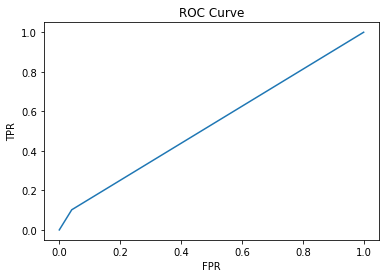

In [107]:
#Plotting the curve

plt.plot(fpr,tpr)

plt.ylabel('TPR')

plt.xlabel('FPR')

plt.title('ROC Curve')

plt.show()

The above ROC graph shows the relation between true positivity rate and False positivity rate for Decision Tree Classifier Model. A smaller area under the curve indicates that the True positivity rate is higher when comapred with the GBT classifier. 

In [187]:
#Creating a Pandas dataframe for Decision Tree Classfier model prediction
df_pred_pd = predictions.toPandas()

cor = df_pred_pd.corr()

#Plotting a correlation plot
cor.style.background_gradient(cmap='coolwarm')

,ID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,LTV,AGE,MonthlyIncome,ZiPCODE,WRITE-OFF-AMT_sum,CURRENT-BAL_sum,DISBURSED-AMT/HIGH CREDIT_sum,SELF-INDICATOR_dist,MATCH-TYPE_dist,ACCT-TYPE_dist,CONTRIBUTOR-TYPE_dist,OWNERSHIP-IND_dist,ACCOUNT-STATUS_dist,Top-up,Frequency_index,LoanStatus_index,label,prediction
ID,1.000000,-0.040350,0.034828,0.054169,0.053917,-0.006583,0.037655,-0.056950,0.044545,-0.092672,-0.001685,-0.025662,-0.028787,-0.041938,-0.004991,-0.090054,-0.079036,-0.072192,-0.077599,0.043197,-0.040405,0.194357,0.043197,-0.062499
Tenure,-0.040350,1.000000,0.073554,0.397772,0.395309,0.032359,0.441573,0.005502,-0.003279,0.050332,0.005475,-0.000979,0.001064,0.012780,0.001671,0.001672,0.010413,0.008090,0.018763,0.040263,-0.165187,0.137287,0.040263,-0.005250
AssetCost,0.034828,0.073554,1.000000,0.580931,0.580861,0.287018,-0.049569,-0.041094,0.054559,0.157845,-0.005242,0.042781,0.021426,0.021568,0.007095,0.055389,0.042565,0.025233,0.034753,0.072383,-0.042809,0.111798,0.072383,0.035703
AmountFinance,0.054169,0.397772,0.580931,1.000000,0.998741,0.365027,0.717976,-0.028294,0.047354,0.176433,0.004880,0.060056,0.033920,0.062474,0.002906,0.092600,0.077580,0.067935,0.076385,0.113899,-0.179007,0.213055,0.113899,0.061725
DisbursalAmount,0.053917,0.395309,0.580861,0.998741,1.000000,0.368723,0.717973,-0.027575,0.047806,0.175710,0.004998,0.060133,0.034090,0.063002,0.002978,0.093244,0.078174,0.068396,0.076485,0.114342,-0.180185,0.209967,0.114342,0.062277
EMI,-0.006583,0.032359,0.287018,0.365027,0.368723,1.000000,0.124822,0.061067,0.051656,0.006843,0.004940,0.031871,0.022030,0.085597,-0.001842,0.099748,0.103227,0.069109,0.095955,0.051129,-0.487946,-0.017666,0.051129,0.060271
LTV,0.037655,0.441573,-0.049569,0.717976,0.717973,0.124822,1.000000,0.002041,0.010986,0.109588,0.005543,0.040441,0.027041,0.055898,-0.000780,0.069270,0.061887,0.062219,0.065321,0.075938,-0.121761,0.154034,0.075938,0.045977
AGE,-0.056950,0.005502,-0.041094,-0.028294,-0.027575,0.061067,0.002041,1.000000,0.013231,0.105889,0.000412,0.003591,0.004141,0.037168,0.006686,0.024484,0.068819,0.004544,0.038425,-0.017760,-0.083783,-0.052025,-0.017760,0.002875
MonthlyIncome,0.044545,-0.003279,0.054559,0.047354,0.047806,0.051656,0.010986,0.013231,1.000000,-0.044688,-0.001956,0.024295,0.009647,0.016959,0.001382,0.036009,0.027587,0.010509,0.019224,0.018485,-0.052074,0.039367,0.018485,0.026741
ZiPCODE,-0.092672,0.050332,0.157845,0.176433,0.175710,0.006843,0.109588,0.105889,-0.044688,1.000000,-0.003582,-0.020566,-0.002537,-0.009327,0.009575,0.032801,0.029082,0.002901,0.029815,0.036377,0.061499,0.030149,0.036377,0.021738


The most important features for Decision Tree Classifier are: ACCT-TYPE_dist, CONTRIBUTOR-TYPE_dist, ACCOUNT-STATUS_dist, OWNERSHIP-IND_dist and CURRENT-BAL_sum

In [179]:
#Creating a Pandas dataframe for GBT Classfier model prediction
df_predgbt_pd = predictions_gbt.toPandas()

cor = df_predgbt_pd.corr()

#Plotting a correlation plot
cor.style.background_gradient(cmap='coolwarm')

,ID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,LTV,AGE,MonthlyIncome,ZiPCODE,WRITE-OFF-AMT_sum,CURRENT-BAL_sum,DISBURSED-AMT/HIGH CREDIT_sum,SELF-INDICATOR_dist,MATCH-TYPE_dist,ACCT-TYPE_dist,CONTRIBUTOR-TYPE_dist,OWNERSHIP-IND_dist,ACCOUNT-STATUS_dist,Top-up,Frequency_index,LoanStatus_index,label,prediction
ID,1.000000,-0.040350,0.034828,0.054169,0.053917,-0.006583,0.037655,-0.056950,0.044545,-0.092672,-0.001685,-0.025662,-0.028787,-0.041938,-0.004991,-0.090054,-0.079036,-0.072192,-0.077599,0.043197,-0.040405,0.194357,0.043197,-0.026803
Tenure,-0.040350,1.000000,0.073554,0.397772,0.395309,0.032359,0.441573,0.005502,-0.003279,0.050332,0.005475,-0.000979,0.001064,0.012780,0.001671,0.001672,0.010413,0.008090,0.018763,0.040263,-0.165187,0.137287,0.040263,0.035231
AssetCost,0.034828,0.073554,1.000000,0.580931,0.580861,0.287018,-0.049569,-0.041094,0.054559,0.157845,-0.005242,0.042781,0.021426,0.021568,0.007095,0.055389,0.042565,0.025233,0.034753,0.072383,-0.042809,0.111798,0.072383,0.091136
AmountFinance,0.054169,0.397772,0.580931,1.000000,0.998741,0.365027,0.717976,-0.028294,0.047354,0.176433,0.004880,0.060056,0.033920,0.062474,0.002906,0.092600,0.077580,0.067935,0.076385,0.113899,-0.179007,0.213055,0.113899,0.132102
DisbursalAmount,0.053917,0.395309,0.580861,0.998741,1.000000,0.368723,0.717973,-0.027575,0.047806,0.175710,0.004998,0.060133,0.034090,0.063002,0.002978,0.093244,0.078174,0.068396,0.076485,0.114342,-0.180185,0.209967,0.114342,0.131908
EMI,-0.006583,0.032359,0.287018,0.365027,0.368723,1.000000,0.124822,0.061067,0.051656,0.006843,0.004940,0.031871,0.022030,0.085597,-0.001842,0.099748,0.103227,0.069109,0.095955,0.051129,-0.487946,-0.017666,0.051129,0.073738
LTV,0.037655,0.441573,-0.049569,0.717976,0.717973,0.124822,1.000000,0.002041,0.010986,0.109588,0.005543,0.040441,0.027041,0.055898,-0.000780,0.069270,0.061887,0.062219,0.065321,0.075938,-0.121761,0.154034,0.075938,0.082621
AGE,-0.056950,0.005502,-0.041094,-0.028294,-0.027575,0.061067,0.002041,1.000000,0.013231,0.105889,0.000412,0.003591,0.004141,0.037168,0.006686,0.024484,0.068819,0.004544,0.038425,-0.017760,-0.083783,-0.052025,-0.017760,-0.002167
MonthlyIncome,0.044545,-0.003279,0.054559,0.047354,0.047806,0.051656,0.010986,0.013231,1.000000,-0.044688,-0.001956,0.024295,0.009647,0.016959,0.001382,0.036009,0.027587,0.010509,0.019224,0.018485,-0.052074,0.039367,0.018485,0.026504
ZiPCODE,-0.092672,0.050332,0.157845,0.176433,0.175710,0.006843,0.109588,0.105889,-0.044688,1.000000,-0.003582,-0.020566,-0.002537,-0.009327,0.009575,0.032801,0.029082,0.002901,0.029815,0.036377,0.061499,0.030149,0.036377,0.041418


The most important features for GBT Classifier are: ACCT-TYPE_dist,CONTRIBUTOR-TYPE_dist, ACCOUNT-STATUS_dist, OWNERSHIP-IND_dist and CURRENT-BAL_sum 

From the above tables we have the most important features for GBT Classifier and Decision Tree Classfier: ACCT-TYPE_dist,CONTRIBUTOR-TYPE_dist, ACCOUNT-STATUS_dist, OWNERSHIP-IND_dist and CURRENT-BAL_sum. GBT Classifier classification metrics are given as accuracy = 72.3%, precision = 41.8%, AOC = 0.6610369503088513 and for Decision Tree Classfier, metrics are given as accuracy = 73.9%, precision = 45.2%, AOC = 0.49777515822695434. Since the accuracy and precision are higher for the Decision Tree classifier, we can consider it to be a better model than the GBT Classifier. 

The area under the curve for the Decision Tree Classifier is smaller which indicates lower False positivity rate and higher true positivity rate. 

The ROC curve for Decision Tree classifier has been plotted above.


In [108]:
#Question 2.3.5

#Rebalancing the data using all Top-up = 1 rows

top0_sampled = top_0.sample(True, 0.6995842429) #percentage of top-up=0 which is twice as much as top-up=1 values

new_sampled_df = top0_sampled.unionAll(top_1)

In [109]:
new_sampled_df.count()

75385

In [110]:
#Ratio
top0_sampled.count()/top_1.count()

1.984008233384792

In [111]:
#Fitting the pipeline model on the new training data
pipelineModel1 = pipeline.fit(new_sampled_df)

#Applying the model on the test set
predictions1 = pipelineModel1.transform(test)

#Displaying the predictions against the true labels 
predictions1.groupBy('Top-up','prediction').count().show()

+------+----------+-----+
|Top-up|prediction|count|
+------+----------+-----+
|     1|       0.0| 5165|
|     0|       0.0|16814|
|     1|       1.0| 1078|
|     0|       1.0| 1280|
+------+----------+-----+



In [112]:
# Calculate the elements of the confusion matrix

#True Negativity
TN = predictions1.filter('prediction = 0 AND label = 0').count()

#True Positivity
TP = predictions1.filter('prediction = 1 AND label = 1').count()

#False Negativity 
FN = predictions1.filter('prediction = 0 AND label = 1').count()

#False Positivity
FP = predictions1.filter('prediction = 1 AND label = 0').count()

print("DecisionTreeClassifier classification metrics: accuracy, precision and recall :", compute_metrics(predictions1,TN,TP,FN,FP))

DecisionTreeClassifier classification metrics: accuracy, precision and recall : (0.7351768911533878, 0.457167090754877, 0.17267339420150568)


In [113]:
#Question 3.1
from pyspark.ml.clustering import KMeans

test_df = spark.createDataFrame([[0, 35.3, 37.5],
[1, 41.4, -23.5],
[2, 28.3, -13.3],
[3, 09.5, -9.0],
[4, 62.8, -18.23],
[5, 63.8, -18.33],
[6, 82.8, -17.23],
[7, 52.8, -13.43],
[8, 72.8, 48.23],
[9, 65.8, 15.43],
[10, 42.8, -13.23] ],
["ID","Att_1", "Att_2"])

assembler = VectorAssembler(
inputCols=["Att_1", "Att_2"],
outputCol='features')

kmeans = KMeans(k=4).fit(assembler.transform(test_df))

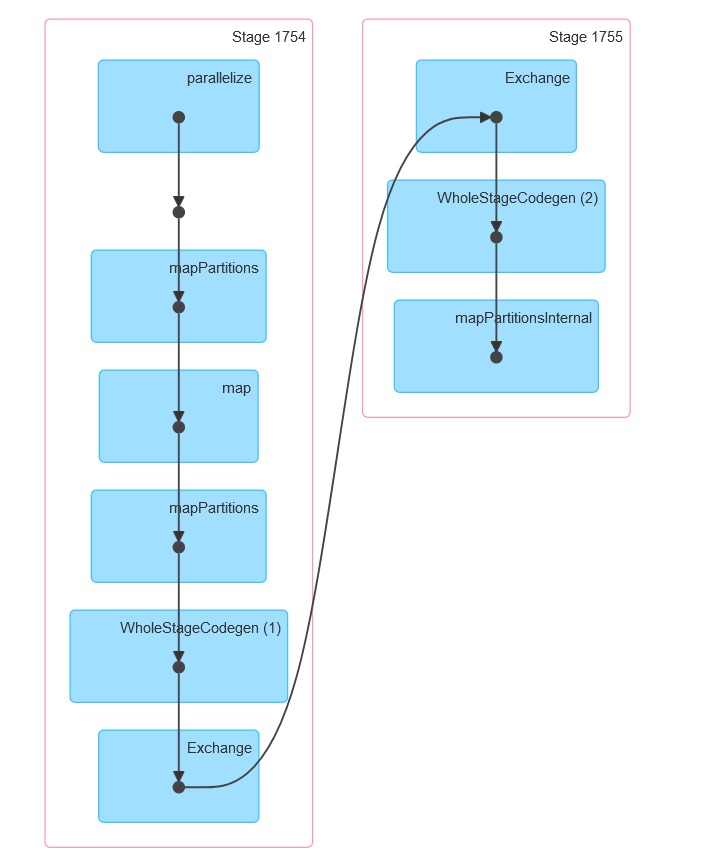

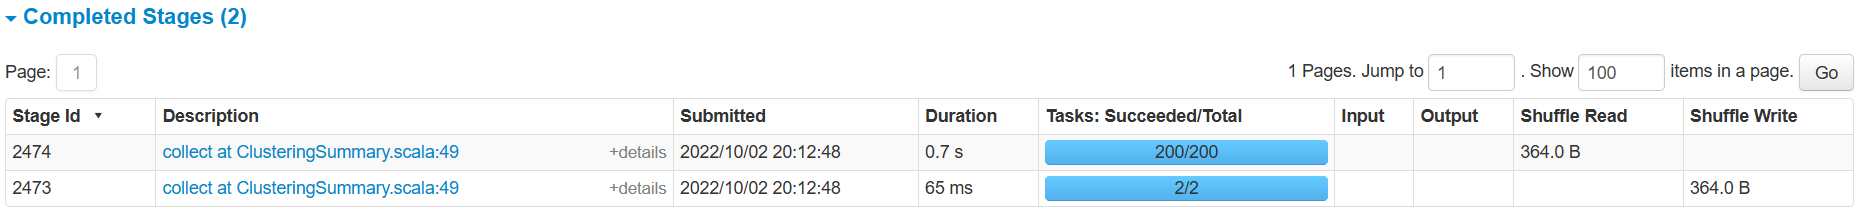

Number of jobs : 202

Reference: https://arxiv.org/abs/1203.6402

Question 3.2

 
The method used for initialising centres for K-Means clustering in spark i.e, the spark. mllib includes a parallelized variant of the k-means++ method which is also the called kmeans||. K-Means ++ is designed to push the centres as far away from each other as possible so to minimise the overlap of datapoints between the centres. This approach hinders it when the data is large as k number of passes have to be made as it is sequential in nature.

kmeans|| uses an oversampling factor = Ω(k), which differentiates it from the k-means++. A cluster centre is chosen randomly from the given data points with the cost being calculated as ψ.  K-means|| can obtain a nearly optimal result over a logarithamic number of passes.It therefore proceeds in logψ iterations. For each logψ iteration, given a set C of cluster centers, it samples each centre with probability l·d2(x,C)/φX(C) where x belongs to the set of cluster centres i.e, C. 
The sampled points are then added to C, the quantity φX(C) is updated and the iteration is continued.

Generally, expected number of points chosen in each iteration is  l(oversampling factor) and at the end, the expected number of points in set C is l log ψ, which is usually more than 'k'. Therefore, when the cluster centres generated are more than the k value, weights are assigned for generated cluster centres and then they are reclustered into 'k' clusters. 
